# Diabetes Prediction using Linear, Ridge, and Lasso Regression

## **Objective**
In this tutorial, we will analyze the **Diabetes dataset** and explore how **Linear Regression**, **Ridge Regression**, and **Lasso Regression** perform.

### **Steps:**
1. Perform **Exploratory Data Analysis (EDA)**.
2. Train a **Simple Linear Regression Model**.
3. Use **Cross-Validation (CV) to Find the Best Lambda** for **Ridge Regression**.
4. Use **Cross-Validation (CV) to Find the Best Lambda** for **Lasso Regression**.
5. Interpret **Feature Selection** in Lasso.


---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### **Dataset Overview**

Conduct EDA on this dataset to learn about it.

1. Get general information about the columns, etc.
2. Generate a heatmap to understand correlations
3. Generate a pairplot to understand the relationships between variables

Anything else?



In [5]:
# Load the Diabetes dataset
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['Target'] = diabetes.target  # Target variable

In [13]:
# 1. General Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [14]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [15]:
print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

In [ ]:
# 2. Heatmap for Correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 3. Pairplot for Relationships
sns.pairplot(df)
plt.suptitle('Pairplot of Diabetes Dataset', y=1.02)
plt.show()

# Additional EDA:
# - Distribution plots for each feature:
#   - sns.displot(df['feature_name'])
# - Box plots to identify outliers:
#   - sns.boxplot(x='Target', y='feature_name', data=df)
# - Scatter plots to visualize relationships between specific features and target:
#   - plt.scatter(df['feature_name'], df['Target'])
# - Check for missing values:
#   - df.isnull().sum()

---

## **Simple Linear Regression**

### **Define Features and Target**

In [6]:
# Define Features and Target
X = df.drop(columns=['Target'])
y = df['Target']

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Simple Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"### Linear Regression Results")
print(f"Linear Regression RMSE: {rmse:.4f}")

### Linear Regression Results
Linear Regression RMSE: 53.8534


### Calculate and Print $R^2$

In [8]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared result: {r2:.4f}")

R-squared result: 0.4526


# Reflection Question:
- What does the RMSE tell us about model performance? What are its limitations?
  -  The model's predictions are on average, there's room for improvement in the model's accuracy.
  - RMSE is sensitive to outliers in the data.

---

## **Ridge Regression with Cross-Validation**

### **Standardize Features**

In [9]:
# Standardizing Features for Ridge and Lasso Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Ridge Regression and CV

In [10]:
# Define a range of alpha values (λ) to test in Ridge Regression
# np.logspace(-3, 3, 50) generates 50 values between 10^(-3) and 10^3 (0.001 to 1000)
alphas = np.logspace(-3, 3, 50)

# Perform Grid Search to find the best alpha (λ) for Ridge Regression
# GridSearchCV tests different alpha values using 5-fold cross-validation (cv=5)
# It evaluates models using negative mean squared error (scoring='neg_mean_squared_error')
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')

# Fit Ridge model on the training data using cross-validation to find best alpha
ridge_cv.fit(X_train_scaled, y_train)

# Print the best alpha (λ) value found by cross-validation
print(f"### Ridge Regression")
print(f"Best Ridge Alpha: {ridge_cv.best_params_['alpha']}")

# Train the final Ridge model using the best alpha found by GridSearchCV
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha'])

# Fit the Ridge model using standardized training data
ridge_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_best.predict(X_test_scaled)

# Calculate Root Mean Squared Error (RMSE) to evaluate model performance
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Print the RMSE for Ridge Regression
print(f"Ridge Regression RMSE: {rmse_ridge:.4f}")

### Ridge Regression
Best Ridge Alpha: 25.595479226995334
Ridge Regression RMSE: 53.5216


### Calculate and Print $R^2$

In [11]:
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression R-squared: {r2_ridge:.4f}")

Ridge Regression R-squared: 0.4593


# Reflection Question:
- How does Ridge regression help with multicollinearity?
 - Ridge Regression addresses multicollinearity by adding a penalty term to the ordinary least squares (OLS) loss function. This penalty term is proportional to the sum of squared regression coefficients (L2 regularization).

## **LASSO Regression with Cross-Validation**

In [ ]:
# Perform Grid Search to find the best alpha (λ) for Lasso Regression
# Lasso can take longer to converge, so we set max_iter=10000 to ensure stability
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')

# Fit Lasso model on the training data using cross-validation to find best alpha
lasso_cv.fit(X_train_scaled, y_train)

# Print the best alpha (λ) value found by cross-validation
print(f"### Lasso Regression")
print(f"Best Lasso Alpha: {lasso_cv.best_params_['alpha']}")

# Train the final Lasso model using the best alpha found by GridSearchCV
lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha'], max_iter=10000)

# Fit the Lasso model using standardized training data
lasso_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_best.predict(X_test_scaled)

# Calculate Root Mean Squared Error (RMSE) to evaluate model performance
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Print the RMSE for Lasso Regression
print(f"Lasso Regression RMSE: {rmse_lasso:.4f}")

### Lasso Regression
Best Lasso Alpha: 1.5264179671752334
Lasso Regression RMSE: 52.9310


### Calculate and Print $R^2$

# Reflection Questions:
- How does Lasso regression perform feature selection? Why does it set some coefficients to zero?
- Based on RMSE values, which model performed best?
- Based on R squared values, which model performed best?
- Why might Ridge or Lasso be preferable over simple linear regression?

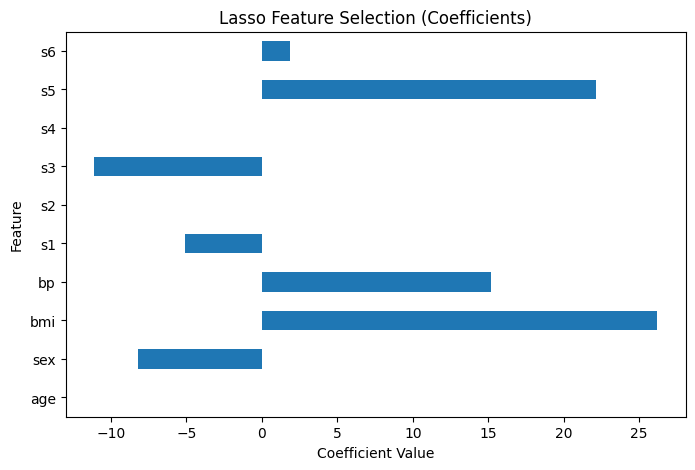

In [ ]:
# Lasso Feature Importance
lasso_coef = pd.Series(lasso_best.coef_, index=X.columns)
plt.figure(figsize=(8, 5))
lasso_coef.plot(kind='barh')
plt.title('Lasso Feature Selection (Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Reflection Question:
- Which features were eliminated by Lasso? What does this tell us about their importance in predicting the target variable?